In [1]:
from random import randint
from collections import Counter
from __future__ import division

In [2]:
class BirthdayProblem(object):
    '''
    Calculates the percentage of time two people in a room have the same
    birthday across 5,000 simulations, given the size of the room
    '''
    def __init__(self, num_people, num_sims=5000):
        self.people = range(0, num_people)
        self.num_sims = num_sims
    
    def generate_birthdays(self):
        return [randint(1, 365) for _ in self.people]
    
    def get_matches(self):
        match_table = Counter()
        for b in self.generate_birthdays():
            match_table[b] += 1
        return match_table
    
    def was_match(self):
        top = self.get_matches().most_common(1)
        return top[0][1] > 1

    def simulate(self):
        sims = [self.was_match() for _ in range(0, self.num_sims)]
        return sum(sims)/len(sims)

In [3]:
people = range(1,101)
pct_match = [BirthdayProblem(n).simulate() for n in people]

In [4]:
threshold_50 = people[pct_match.index(next(x for x in pct_match if x > 0.5))]
print "It takes %d people in the room to make it a 50%% chance of matching birthdays" % threshold_50

It takes 23 people in the room to make it a 50% chance of matching birthdays


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

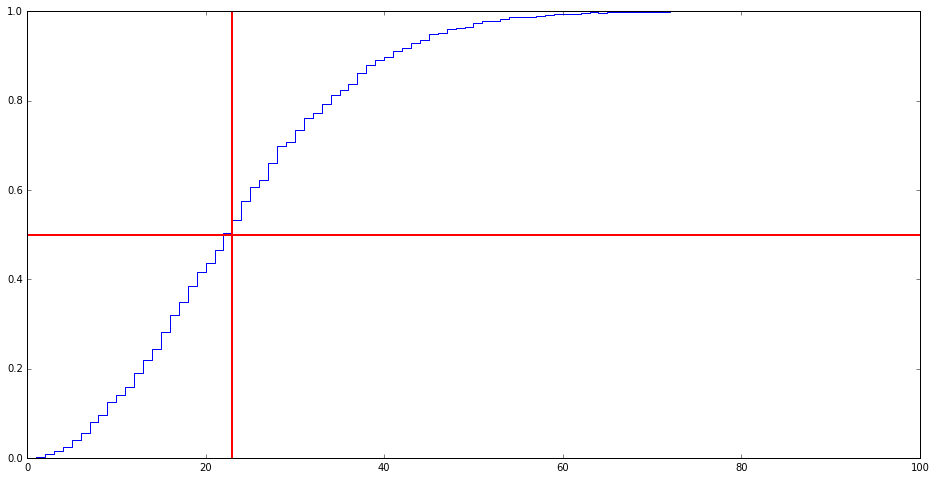

In [6]:
plt.figure(figsize=(16,8))

plt.step(people, pct_match)
plt.axhline(0.5, c='red', linewidth=2)
plt.axvline(threshold_50, c='red', linewidth=2)